In [16]:
import matplotlib.pyplot as plt
def plot_metrics_with_values(metrics_dict, title='RAG Metrics'):
    """
    Plots a bar chart for metrics contained in a dictionary and annotates the values on the bars.
    Args:
    metrics_dict (dict): A dictionary with metric names as keys and values as metric scores.
    title (str): The title of the plot.
    """
    names = list(metrics_dict.keys())
    values = list(metrics_dict.values())
    plt.figure(figsize=(10, 7))
    bars = plt.barh(names, values, color='skyblue')
    # Adding the values on top of the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01,  # x-position
                 bar.get_y() + bar.get_height() / 2,  # y-position
                 f'{width:.4f}',  # value
                 va='center')
    plt.xlabel('Score')
    plt.title(title)
    plt.xlim(0, 1.0)  # Setting the x-axis limit to be from 0 to 1
    plt.show()

In [17]:
import json
from typing import Dict


def get_metrics_as_dict(filename: str) -> Dict:
    metric_json = {}
    with open(filename, "r") as f:
        metric_json = json.load(f)
    return dict(metric_json)

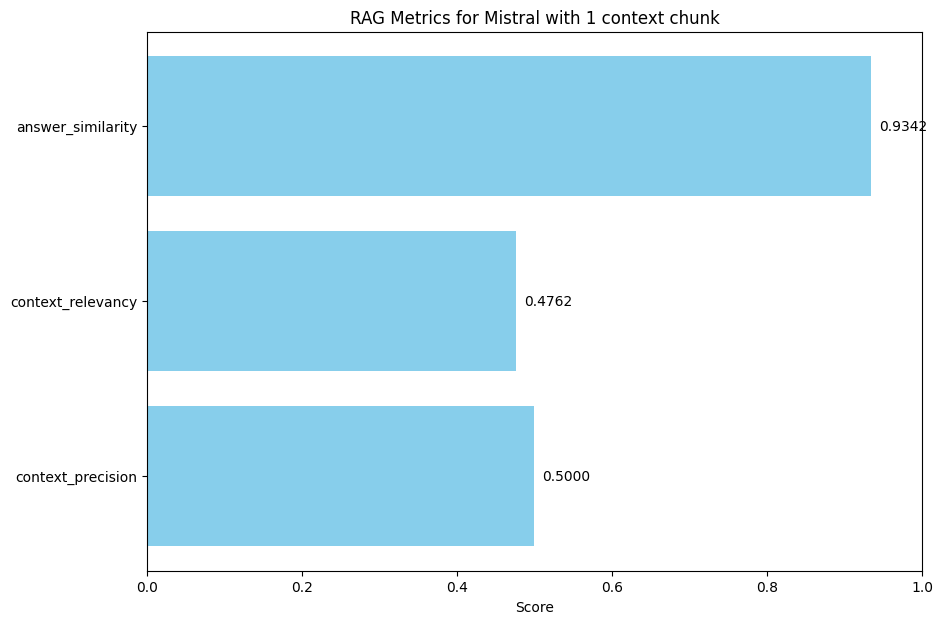

In [18]:
metrics_1 = get_metrics_as_dict("../evaluations/result_mistral_basic_1.json")

plot_metrics_with_values(metrics_1, "RAG Metrics for Mistral with 1 context chunk")

{'context_precision': 0.6944444443840277, 'context_relevancy': 0.09025178417620278, 'answer_similarity': 0.9444095850494204}


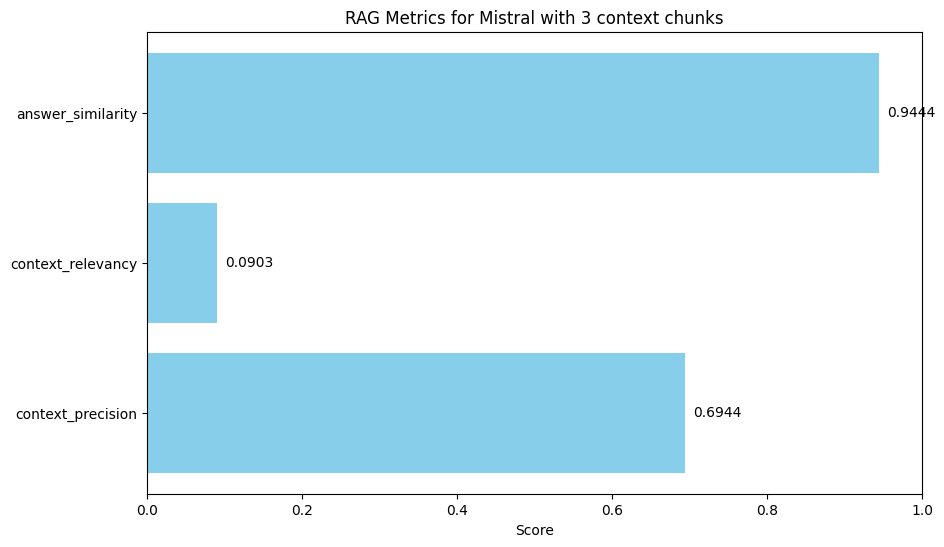

In [7]:
metrics_3 = get_metrics_as_dict("../evaluations/result_mistral_basic_3.json")

plot_metrics_with_values(metrics_3, "RAG Metrics for Mistral with 3 context chunks")

{'context_precision': 0.7208333332708333, 'context_relevancy': 0.07468185367767222, 'answer_similarity': 0.9569450452800389}


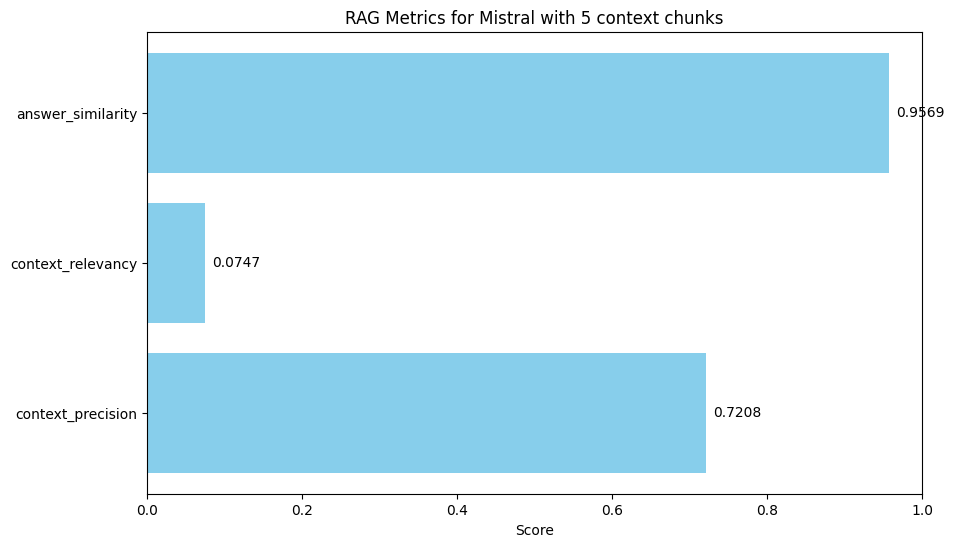

In [8]:
metrics_5 = get_metrics_as_dict("../evaluations/result_mistral_basic_5.json")

plot_metrics_with_values(metrics_5, "RAG Metrics for Mistral with 5 context chunks")

{'context_precision': 0.5741071428148165, 'context_relevancy': 0.062387634239090745, 'answer_similarity': 0.955834211625572}


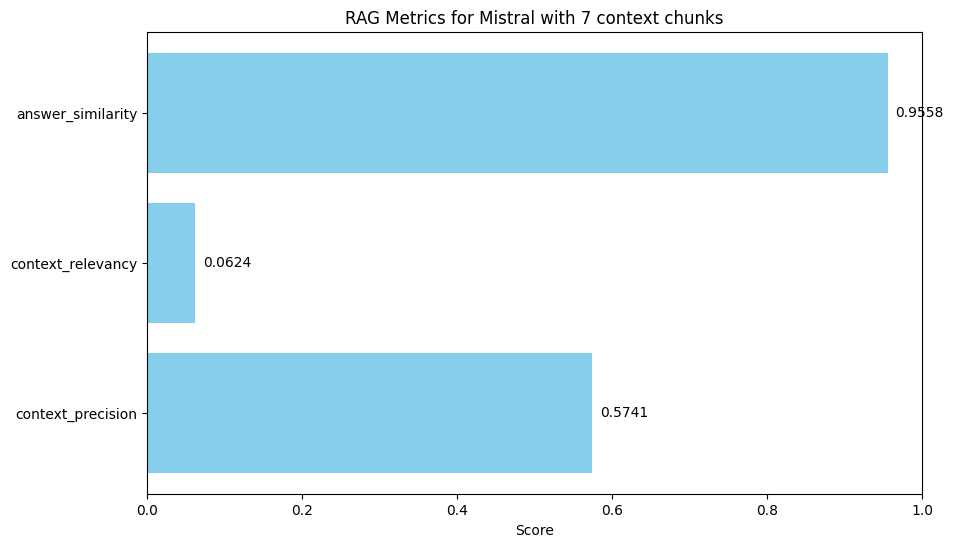

In [9]:
metrics_7 = get_metrics_as_dict("../evaluations/result_mistral_basic_7.json")

plot_metrics_with_values(metrics_7, "RAG Metrics for Mistral with 7 context chunks")

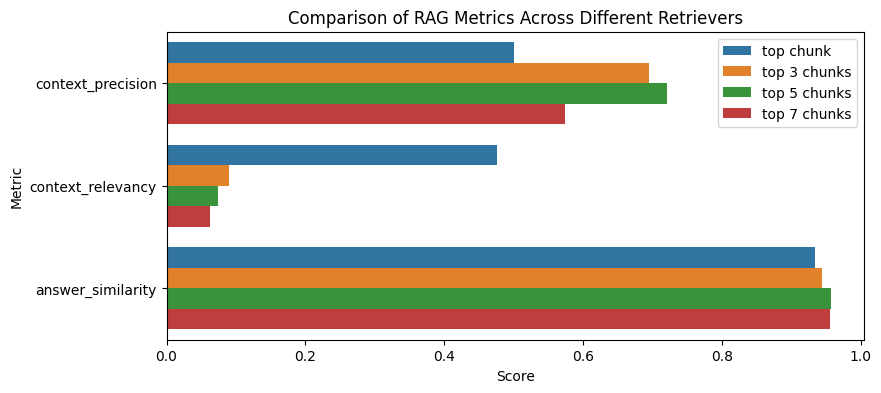

In [33]:
import pandas as pd
import seaborn as sns
# Sample data
data = {
    'Metric': ['context_precision', 'context_relevancy', 'answer_similarity'],
    'top chunk': metrics_1.values(),
    'top 3 chunks': metrics_3.values(),
    'top 5 chunks': metrics_5.values(),
    'top 7 chunks': metrics_7.values()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame
df_melt = df.melt(id_vars='Metric', var_name='Retriever Type', value_name='Score')

# Plotting
plt.figure(figsize=(9, 4))
sns.barplot(x='Score', y='Metric', hue='Retriever Type', data=df_melt)
plt.title('Comparison of RAG Metrics Across Different Retrievers')
plt.legend(loc='upper right')
plt.show()

# Observations
1. Using top 5 relevant chunks seems to generate the most accurate answers
2. The more number of chunks you pass in your prompt, the lower goes the context relevancy score. This implies in most cases a lot of irrelevant content might be getting sent to the LLM, which suggests that there is a potential inefficiency and there might be scope of improvement by
a. using smaller text chunks
b. using similarity score threshold to filter out irrelevant context
c. different embedding models.